## Notebook for analysing newspaper articles using NLTK, WORDCLOUD.

In [155]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize as wt
from nltk.probability import FreqDist
from wordcloud import WordCloud as cloud

from nltk.corpus import stopwords 


In [2]:
#data = pd.read_csv('maddy_water.txt', sep=" ")
#data.columns = ["Title", "Media", "Description"]
df = pd.read_csv('new.txt', delim_whitespace=False, delimiter="\t", names=("Serial","Title","Headline", "Media", "Description"),
                   dtype={'Serial':np.str,'Title': np.str,'Headline':np.str, 'Media': np.str, 'Description': np.str})

In [3]:
df.head()

,Serial,Title,Headline,Media,Description
0,1.,Algae Blooms In Hensley Lake Pose Health Risks...,NaN,NaN,NaN
1,2.,Sierra Star,NaN,NaN,NaN
2,3.,The Central Valley Regional Water Quality Cont...,NaN,NaN,NaN
3,4.,Is help on the way for Californians whose tap ...,NaN,NaN,NaN
4,5.,CALmatters,NaN,NaN,NaN


In [4]:
coloumns = df['Title']

In [5]:
index =coloumns.index.values.tolist()


In [6]:
df['Title'][0]

'Algae Blooms In Hensley Lake Pose Health Risks, Officials Say'

In [7]:
for i in range(len(index)):
    if((index[i] % 3) == 0):
        #print(i+1)
        df['Headline'][i] = (coloumns[index[i]])
    elif((index[i] % 3) == 1):
          df['Media'][i-1] =(coloumns[index[i]])
    else:
        df['Description'][i-2] = (coloumns[index[i]])

In [8]:
df = df.dropna()


In [9]:
df = df.drop(['Serial', 'Title'], axis=1)

In [10]:
df

,Headline,Media,Description
0,Algae Blooms In Hensley Lake Pose Health Risks...,Sierra Star,The Central Valley Regional Water Quality Cont...
3,Is help on the way for Californians whose tap ...,CALmatters,Karen Lewis knows about water problems. The 67...
6,EDITORIAL: How do you make California water wa...,Sacramento Bee,Anyone who has spent much time in California k...
9,Stratford Water Back Online,Hanford Sentinel,There's some good news for the residents of St...
12,"Trump Administration, California Headed For Sh...",Valley Public Radio,California is often at odds with the Trump adm...
15,Another reason to save California forests? Our...,The Sacramento Bee,This summer's wildfires have taken a terrible ...
18,EDITORIAL: Respect? We're Not Getting It From ...,Modesto Bee,We'd often prefer to ignore what happens in Sa...
21,Stratford Water Back Online,Hanford Sentinel,There's some good news for the residents of St...
24,"EDITORIAL: This Time, A State Water Bond Has R...",Fresno Bee,Proposition 3 on the November ballot would dir...
27,Connecting Water Systems for Safe Drinking Water,PPIC,"Most Californians have safe drinking water, bu..."


In [18]:
text = df['Description'][0]
text

"The Central Valley Regional Water Quality Control Board announced the finding of the algae blooms Thursday afternoon in Madera County's Hensley Lake and warned touching or swallowing the contaminated water could pose health risks."

In [24]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['The', 'Central', 'Valley', 'Regional', 'Water', 'Quality', 'Control', 'Board', 'announced', 'the', 'finding', 'of', 'the', 'algae', 'blooms', 'Thursday', 'afternoon', 'in', 'Madera', 'County', "'s", 'Hensley', 'Lake', 'and', 'warned', 'touching', 'or', 'swallowing', 'the', 'contaminated', 'water', 'could', 'pose', 'health', 'risks', '.']


In [25]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 34 samples and 36 outcomes>


In [26]:
fdist.most_common(2)


[('the', 3), ('The', 1)]

In [27]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [61]:
top_50 = df.Media.value_counts().nlargest(50)

In [62]:
top_50

Sacramento Bee                           54
Modesto Bee                              44
Fresno Bee                               38
Los Angeles Times                        33
The Mercury News                         21
ABC30                                    18
Public Policy Institute of California    17
KQED                                     15
San Francisco Chronicle                  15
The Sacramento Bee                       12
Hanford Sentinel                         12
CALmatters                               10
The Bakersfield Californian              10
News Deeply                               9
Valley Public Radio                       9
Water Education Foundation                8
Visalia Times-Delta                       8
Bakersfield Californian                   7
Sierra Star                               6
The Fresno Bee                            6
San Diego Union-Tribune                   5
Madera Tribune                            5
Capital Public Radio            

In [36]:
df.Media.nunique()

113

In [42]:
media_freq = df.Media.value_counts()

In [43]:
media_freq

Sacramento Bee                              54
Modesto Bee                                 44
Fresno Bee                                  38
Los Angeles Times                           33
The Mercury News                            21
ABC30                                       18
Public Policy Institute of California       17
KQED                                        15
San Francisco Chronicle                     15
The Sacramento Bee                          12
Hanford Sentinel                            12
CALmatters                                  10
The Bakersfield Californian                 10
News Deeply                                  9
Valley Public Radio                          9
Water Education Foundation                   8
Visalia Times-Delta                          8
Bakersfield Californian                      7
Sierra Star                                  6
The Fresno Bee                               6
San Diego Union-Tribune                      5
Madera Tribun

In [46]:
Unique_Media = df.Media.nunique()

In [47]:
Unique_Media

113

In [53]:
Unique_media_names= df['Media'].unique()
print (Unique_media_names)

['Sierra Star' 'CALmatters' 'Sacramento Bee' 'Hanford Sentinel'
 'Valley Public Radio' 'The Sacramento Bee' 'Modesto Bee' 'Fresno Bee'
 'PPIC' 'CALMatters' 'Visalia Times-Delta' 'The Modesto Bee' 'Fox&Hounds'
 'ABC30' 'Water Education Foundation'
 'California Department of Water Resources' 'San Diego Union-Tribune'
 'Quartz' 'San Francisco Chronicle' 'WSJ' 'The Beacon'
 'The Business Journal' 'Los Angeles Times' 'KQED' 'UPI' 'VPR' 'FOX40'
 'Forbes' 'Northern California Record' 'Water Deeply' 'Mercury News'
 'NASDAQ' 'Pro Republica' 'Stockton Record' 'KQED Science' 'The Fresno Bee'
 'Madera Tribune' 'California Business Roundtable' 'News Deeply'
 'Economist' 'Bakersfield Californian' 'Sun-Gazette'
 'Public Policy Institute of California' 'Merced Sun-Star'
 'Washington Post' 'Guardian' 'Pacific Standard' 'New York Times'
 'Business Journal' 'Water Education' 'Capital Public Radio'
 'Bakersfield California' 'NPR' 'Desert Sun' 'The Hill' 'E&E News'
 'Record Searchlight' 'Voice of San Diego

In [55]:
print (df['Media'].values)


['Sierra Star' 'CALmatters' 'Sacramento Bee' 'Hanford Sentinel'
 'Valley Public Radio' 'The Sacramento Bee' 'Modesto Bee'
 'Hanford Sentinel' 'Fresno Bee' 'PPIC' 'CALmatters' 'CALMatters'
 'Visalia Times-Delta' 'The Sacramento Bee' 'The Modesto Bee'
 'The Modesto Bee' 'Fox&Hounds' 'Modesto Bee' 'Fresno Bee' 'ABC30'
 'Sacramento Bee' 'Water Education Foundation'
 'California Department of Water Resources' 'Sierra Star'
 'San Diego Union-Tribune' 'Modesto Bee' 'Sierra Star' 'Modesto Bee'
 'Modesto Bee' 'The Sacramento Bee' 'Quartz' 'ABC30'
 'San Francisco Chronicle' 'WSJ' 'The Beacon' 'ABC30'
 'The Business Journal' 'San Francisco Chronicle' 'Los Angeles Times'
 'Hanford Sentinel' 'KQED' 'Fresno Bee' 'Sacramento Bee' 'UPI' 'Fresno Bee'
 'VPR' 'Sacramento Bee' 'CALmatters' 'ABC30' 'Modesto Bee' 'Modesto Bee'
 'Hanford Sentinel' 'FOX40' 'ABC30' 'San Francisco Chronicle' 'Forbes'
 'Northern California Record' 'PPIC' 'Fresno Bee' 'ABC30' 'Sacramento Bee'
 'Water Deeply' 'Mercury News' 'NASDA

## Analyse the Description of News Articles

In [129]:
#get string without removing stopwords
desc = df['Description']
text = desc.to_string()
#text

## Generate Wordcloud from the pandas Description coloumn

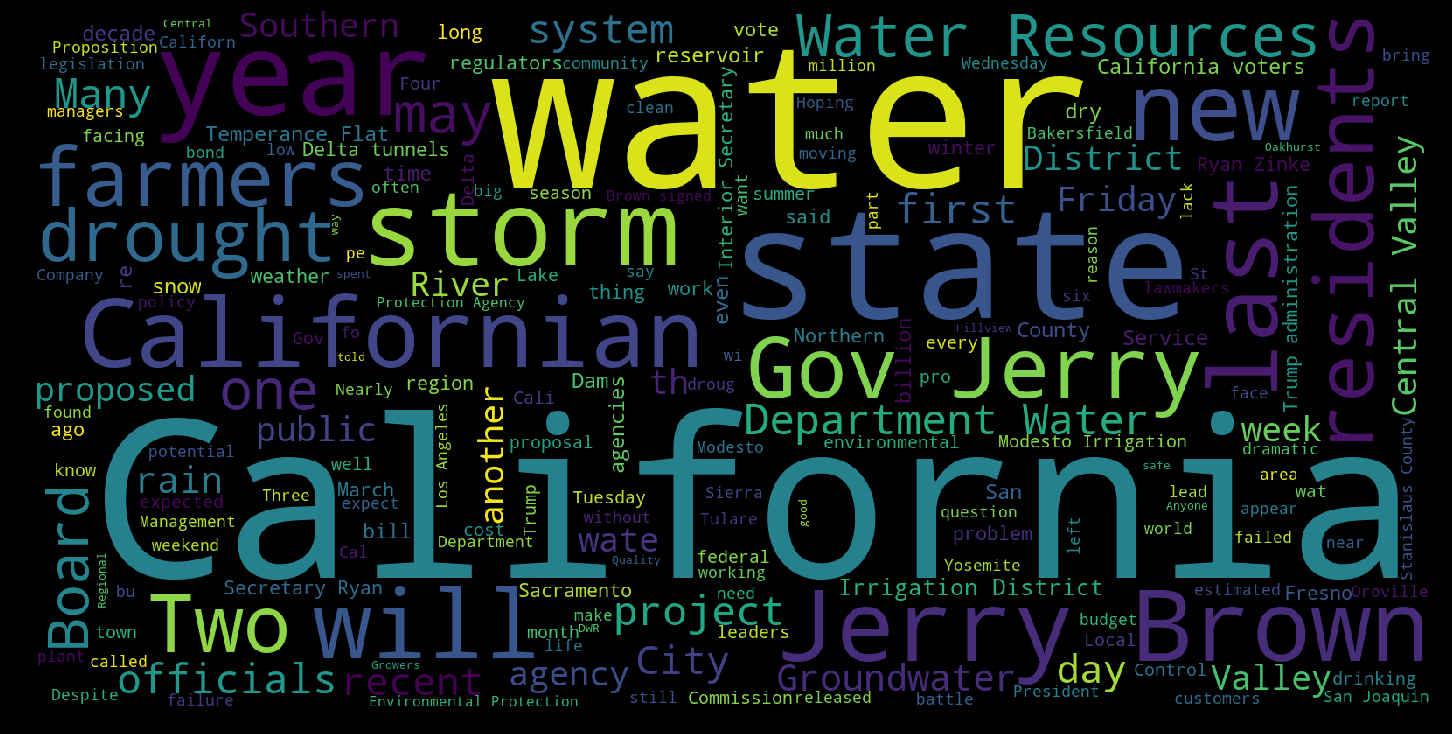

In [128]:

wordcloud = WordCloud(width=1600, height=800).generate(text)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Get Description Coloumn, remove stopwords and then plot wordcloud.

In [135]:
data = df['Description']
description = data.str.cat()

description

'The Central Valley Regional Water Quality Control Board announced the finding of the algae blooms Thursday afternoon in Madera County\'s Hensley Lake and warned touching or swallowing the contaminated water could pose health risks.Karen Lewis knows about water problems. The 67-year-old lives in Compton, where the water coming out of her tap is tinged brown by manganese, a metal similar to iron, from old pipes.Anyone who has spent much time in California knows that our water policies and politics are immensely complicated and contentious.There\'s some good news for the residents of Stratford, who now have running, drinkable water once again.California is often at odds with the Trump administration, and the latest battleground could be in the issue of managing the state\'s precious water supply.This summer\'s wildfires have taken a terrible toll on California. As firefighters gain control and residents begin to rebuild their lives, big questions are emerging about how we invest in our n

In [156]:
#stopwords.words('english').append('water')
stop_words = set(stopwords.words('english')) 
stop_words.add('water')  
word_tokens = word_tokenize(description) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = ""
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence = filtered_sentence +(w) + " " 

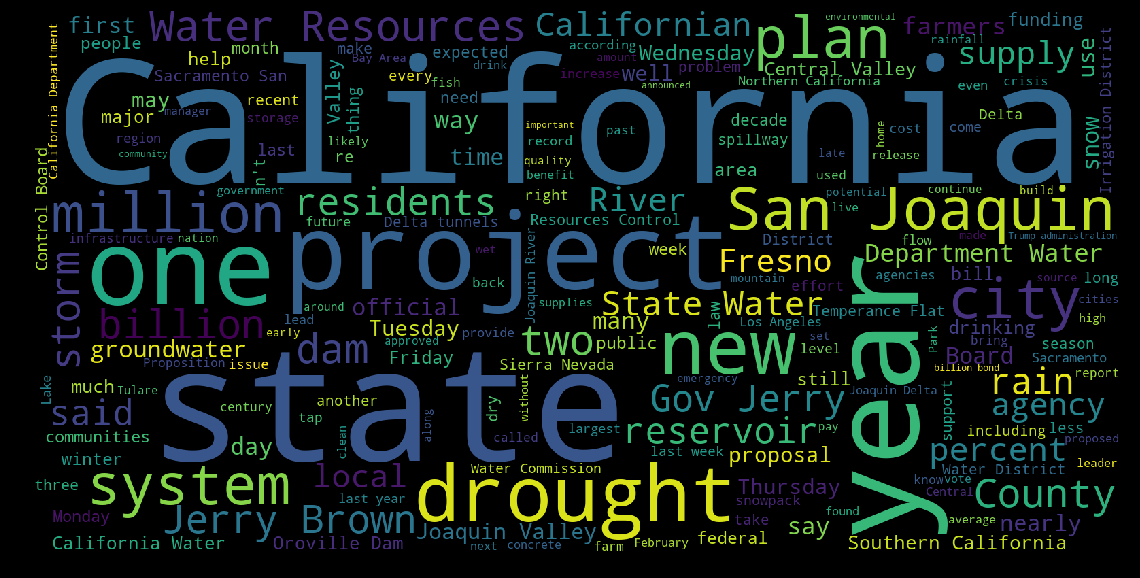

In [157]:
wordcloud = WordCloud(width=1600, height=800).generate(filtered_sentence)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [158]:
wordcloud.words_

{'California': 1.0,
 'state': 0.8492462311557789,
 'year': 0.45226130653266333,
 'project': 0.3316582914572864,
 'one': 0.32663316582914576,
 'drought': 0.3165829145728643,
 'new': 0.3015075376884422,
 'San Joaquin': 0.2613065326633166,
 'plan': 0.24623115577889448,
 'system': 0.24120603015075376,
 'city': 0.23618090452261306,
 'million': 0.23115577889447236,
 'Water Resources': 0.23115577889447236,
 'two': 0.22613065326633167,
 'dam': 0.22110552763819097,
 'billion': 0.21608040201005024,
 'storm': 0.21608040201005024,
 'County': 0.21105527638190955,
 'Jerry Brown': 0.20100502512562815,
 'residents': 0.18592964824120603,
 'Gov Jerry': 0.18090452261306533,
 'reservoir': 0.17587939698492464,
 'rain': 0.1708542713567839,
 'said': 0.1658291457286432,
 'State Water': 0.16080402010050251,
 'River': 0.15577889447236182,
 'percent': 0.15577889447236182,
 'supply': 0.1507537688442211,
 'Californian': 0.1507537688442211,
 'Fresno': 0.1457286432160804,
 'local': 0.1457286432160804,
 'agency': 0.1